<a href="https://colab.research.google.com/github/rafaelssampaio79/Desafio_Especializacao_de_Data_Science_By_RSS/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importa√ß√£o dos dados



In [18]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

# Prepara√ß√£o do Ambiente

In [1]:
!pip install numpy==1.23.5

In [2]:
# Instalando a biblioteca matplotlib pelo pip
!pip install matplotlib

In [1]:
# Instalando uma vers√£o espec√≠fica do matplotlib
!pip install matplotlib==3.6.2

In [2]:
# Importando uma biblioteca sem alias
import matplotlib

In [3]:
matplotlib.__version__

'3.6.2'

In [45]:
# Importando uma biblioteca com alias
import matplotlib.pyplot as plt
import numpy as np

In [5]:
plt.show()

In [6]:
!pip list

Package                               Version
------------------------------------- -------------------
absl-py                               1.4.0
accelerate                            1.7.0
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.1
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
argon2-cffi                           25.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.21.0
astropy                               7.1.0
astropy-iers-data                     0.2025.6.16.0.

# Tratamento das Informa√ß√µes

In [ ]:
# Verificar valores ausentes
loja.isnull().sum()

In [23]:
# Concatenar todas as lojas
# Armazenar os dados em dicion√°rio para facilitar o loop
lojas = {
    "Loja 1": loja,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4
}

In [ ]:
for nome, df in lojas.items():
    print(f"\n Colunas da {nome}:")
    print(df.columns)

In [27]:
# C√°lculo das m√©tricas
faturamento = {}
avaliacoes = {}
frete_medio = {}
produtos_mais_vendidos = {}
produtos_menos_vendidos = {}
categorias_populares = {}

for nome, df in lojas.items():
    faturamento[nome] = df["Pre√ßo"].sum()
    avaliacoes[nome] = df["Avalia√ß√£o da compra"].mean()
    frete_medio[nome] = df["Frete"].mean()
    produtos_mais_vendidos[nome] = df["Produto"].value_counts().idxmax()
    produtos_menos_vendidos[nome] = df["Produto"].value_counts().idxmin()
    categorias_populares[nome] = df["Categoria do Produto"].value_counts().idxmax()

#1. An√°lise do faturamento


In [29]:
print("Faturamento Total:")
print(pd.Series(faturamento).sort_values())

Faturamento Total:
Loja 4    1384497.58
Loja 3    1464025.03
Loja 2    1488459.06
Loja 1    1534509.12
dtype: float64


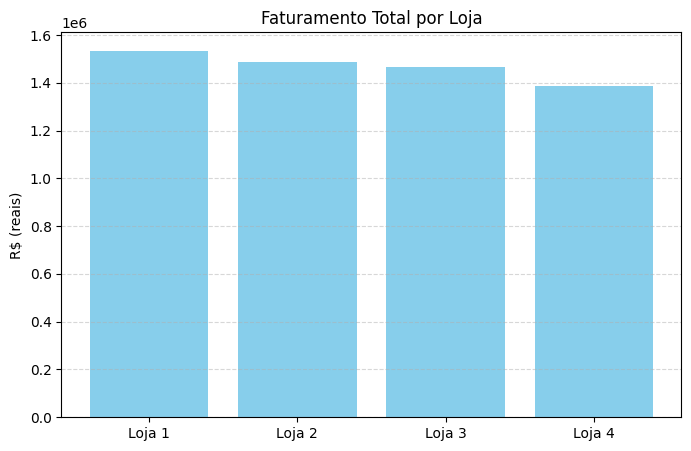

In [42]:
## Gr√°fico: Faturamento total por loja (BARRA)
plt.figure(figsize=(8,5))
plt.bar(faturamento.keys(), faturamento.values(), color='skyblue')
plt.title("Faturamento Total por Loja")
plt.ylabel("R$ (reais)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 2. Vendas por Categoria


In [37]:
print("Categoria Mais Popular por Loja:")
for loja, categoria in categorias_populares.items():
    print(f"{loja}: {categoria}")

Categoria Mais Popular por Loja:
Loja 1: moveis
Loja 2: moveis
Loja 3: moveis
Loja 4: moveis


In [40]:
#Top 3 categorias mais vendidas e seu faturamento por loja

for nome, df in lojas.items():
    print(f"\nüõí {nome}")
    print("-" * 40)

    # Agrupamento por categoria: soma de pre√ßos e contagem
    agrupado = df.groupby("Categoria do Produto").agg({
        "Produto": "count",           # quantidade de vendas
        "Pre√ßo": "sum"                # faturamento
    }).rename(columns={
        "Produto": "Quantidade de Vendas",
        "Pre√ßo": "Faturamento (R$)"
    })

    # Ordenar pelas categorias mais vendidas
    top3 = agrupado.sort_values(by="Quantidade de Vendas", ascending=False).head(3)

    # Exibir resultados
    print(top3)


üõí Loja 1
----------------------------------------
                      Quantidade de Vendas  Faturamento (R$)
Categoria do Produto                                        
moveis                                 465         250178.11
eletronicos                            448         572659.23
brinquedos                             324          23993.78

üõí Loja 2
----------------------------------------
                      Quantidade de Vendas  Faturamento (R$)
Categoria do Produto                                        
moveis                                 442         235234.68
eletronicos                            422         547773.71
brinquedos                             313          21262.21

üõí Loja 3
----------------------------------------
                      Quantidade de Vendas  Faturamento (R$)
Categoria do Produto                                        
moveis                                 499         268095.56
eletronicos                            451   

# 3. M√©dia de Avalia√ß√£o das Lojas

In [32]:
print("Avalia√ß√£o M√©dia:")
print(pd.Series(avaliacoes).sort_values())

Avalia√ß√£o M√©dia:
Loja 1    3.976685
Loja 4    3.995759
Loja 2    4.037304
Loja 3    4.048326
dtype: float64


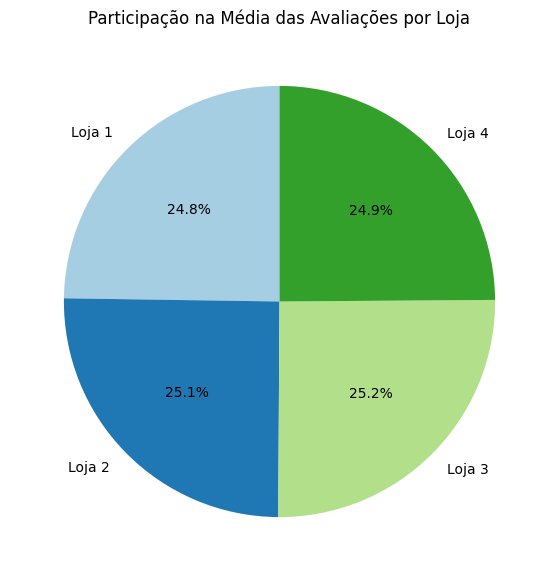

In [46]:
## Gr√°fico: M√©dia das avalia√ß√µes por loja (PIZZA)
plt.figure(figsize=(7,7))
plt.pie(avaliacoes.values(),
        labels=avaliacoes.keys(),
        autopct="%1.1f%%",
        startangle=90,
        colors=plt.cm.Paired(np.arange(len(avaliacoes))))
plt.title("Participa√ß√£o na M√©dia das Avalia√ß√µes por Loja")
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [39]:
print("Produto Mais Vendido por Loja:")
for loja, produto in produtos_mais_vendidos.items():
    print(f"{loja}: {produto}")

Produto Mais Vendido por Loja:
Loja 1: TV Led UHD 4K
Loja 2: Iniciando em programa√ß√£o
Loja 3: Kit banquetas
Loja 4: Cama box


In [38]:
print("Produto Menos Vendido por Loja:")
for loja, produto in produtos_menos_vendidos.items():
    print(f"{loja}: {produto}")

Produto Menos Vendido por Loja:
Loja 1: Headset
Loja 2: Jogo de tabuleiro
Loja 3: Blocos de montar
Loja 4: Guitarra


# 5. Frete M√©dio por Loja


In [34]:
print("Custo M√©dio do Frete:")
print(pd.Series(frete_medio).sort_values())

Custo M√©dio do Frete:
Loja 4    31.278997
Loja 3    33.074464
Loja 2    33.621941
Loja 1    34.691805
dtype: float64


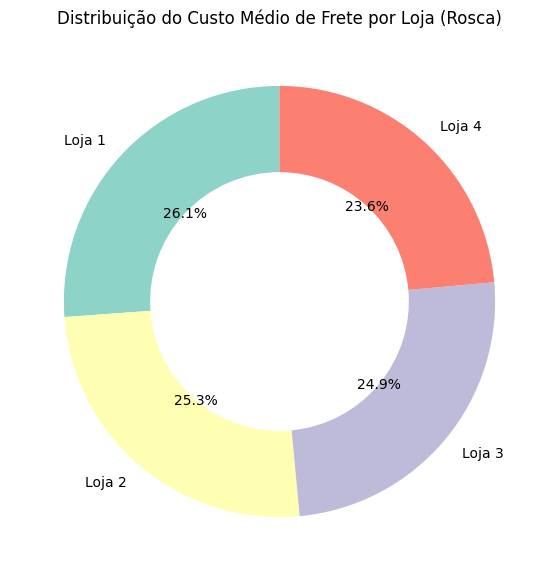

In [47]:
## Gr√°fico: Custo m√©dio do frete por loja (ROSCA / DONUT)
plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    frete_medio.values(),
    labels=frete_medio.keys(),
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.4),  # rosca
    colors=plt.cm.Set3(np.arange(len(frete_medio)))
)
plt.title("Distribui√ß√£o do Custo M√©dio de Frete por Loja (Rosca)")
plt.gca().set_aspect("equal")  # manter formato circular
plt.show()

# 6. Relat√≥rio Final

# üìä Relat√≥rio Final ‚Äì Desafio Allure Store

## üéØ Objetivo
Analisar o desempenho das quatro lojas da rede Alura Store para ajudar o Sr. Jo√£o a decidir qual loja vender. A an√°lise foi baseada em m√©tricas como faturamento, avalia√ß√µes, categorias mais vendidas, produtos destaque e custo m√©dio do frete.

---

## üìà Faturamento Total por Loja

| Loja   | Faturamento Total (R$) |
|--------|------------------------|
| Loja 1 | 1.534.509,12           |
| Loja 2 | 1.488.459,06           |
| Loja 3 | 1.464.025,03           |
| Loja 4 | **1.384.497,58**       |

‚û°Ô∏è **Loja 4 apresenta o menor faturamento total entre as quatro.**

---

## üèÜ Top 3 Categorias Mais Vendidas por Loja

### üõí Loja 1
| Categoria     | Vendas | Faturamento (R$) |
|---------------|--------|------------------|
| M√≥veis        | 465    | 250.178,11       |
| Eletr√¥nicos   | 448    | 572.659,23       |
| Brinquedos    | 324    |  23.993,78       |

### üõí Loja 2
| Categoria     | Vendas | Faturamento (R$) |
|---------------|--------|------------------|
| M√≥veis        | 442    | 235.234,68       |
| Eletr√¥nicos   | 422    | 547.773,71       |
| Brinquedos    | 313    |  21.262,21       |

### üõí Loja 3
| Categoria     | Vendas | Faturamento (R$) |
|---------------|--------|------------------|
| M√≥veis        | 499    | 268.095,56       |
| Eletr√¥nicos   | 451    | 547.699,92       |
| Brinquedos    | 315    |  25.869,20       |

### üõí Loja 4
| Categoria     | Vendas | Faturamento (R$) |
|---------------|--------|------------------|
| M√≥veis        | 480    | 256.705,65       |
| Eletr√¥nicos   | 451    | 545.966,86       |
| Brinquedos    | 338    |  27.015,67       |

---

## ‚≠ê Avalia√ß√£o M√©dia por Loja

| Loja   | Avalia√ß√£o M√©dia |
|--------|------------------|
| Loja 3 | 4,048            |
| Loja 2 | 4,037            |
| Loja 4 | 3,996            |
| Loja 1 | **3,977**        |

‚û°Ô∏è **A Loja 1 apresenta a pior m√©dia de avalia√ß√µes.**

---

## üéØ Produtos Mais Vendidos por Loja

| Loja   | Produto mais vendido      |
|--------|---------------------------|
| Loja 1 | TV Led UHD 4K             |
| Loja 2 | Iniciando em programa√ß√£o  |
| Loja 3 | Kit banquetas             |
| Loja 4 | Cama box                  |

---

## ‚ö†Ô∏è Produtos Menos Vendidos por Loja

| Loja   | Produto menos vendido     |
|--------|---------------------------|
| Loja 1 | Headset                   |
| Loja 2 | Jogo de tabuleiro         |
| Loja 3 | Blocos de montar          |
| Loja 4 | Guitarra                  |

---

## üöö Custo M√©dio do Frete por Loja

| Loja   | Custo M√©dio do Frete (R$) |
|--------|----------------------------|
| Loja 4 | **31,28**                  |
| Loja 3 | 33,07                      |
| Loja 2 | 33,62                      |
| Loja 1 | 34,69                      |

‚û°Ô∏è A **Loja 4 possui o menor custo m√©dio de frete**, o que pode ser um ponto positivo.  
No entanto, seu desempenho geral ainda √© inferior nas demais m√©tricas principais.

---

## üìå Conclus√£o

Ap√≥s an√°lise dos dados, observamos que:

- A **Loja 4** apresenta o **menor faturamento total**.
- Apesar de ter avalia√ß√£o m√©dia um pouco melhor que a Loja 1, a diferen√ßa √© pequena.
- Suas **categorias mais vendidas** n√£o compensam o baixo desempenho financeiro.
- Produtos menos vendidos e valores m√©dios indicam menor engajamento comercial.

### ‚úÖ Recomenda√ß√£o:
Com base nas m√©tricas analisadas, **recomenda-se que o Sr. Jo√£o venda a Loja 4**, pois apresenta:

- O **menor faturamento** entre as quatro unidades;
- Uma **avalia√ß√£o mediana** dos clientes;
- Apesar de ter o **frete mais barato**, isso **n√£o √© suficiente para compensar** seu fraco desempenho financeiro e comercial geral.

By Rafael Schmidt Sampaio.